### Visualizations we want to see
1. Top 5 states and bottom 5 states for each of the 5 years (10 plots)
2. Line chart to show how emissions change throughout the years

In [1]:
#-m pip install --upgrade pip
!pip install xlrd
!pip install openpyxl
!pip install statsmodels
!pip install openpyxl==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 15.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 KB 38.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 121.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 63.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import functools as ft
import math
import seaborn as sns
import altair as alt
import plotly.express as px
import scipy.stats
import openpyxl as xl
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Load in the Yale dataset

In [3]:
excel_path = "/work/ycom.coot.2008-2021 2.xlsx"
df_yale = pd.read_excel(excel_path,'ycom2014-2021.coot2008-2020')
df_yale.head()

,varname,GEOID,GeoName,GeoType,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,congress,1.0,Alabama,State,58.981908,49.802614,49.765859,53.228234,51.458185,47.786980,53.212674,52.105523,54.264808,57.941226,54.301949,54.258945,54.046
1,congress,2.0,Alaska,State,60.132746,46.002393,49.131080,51.257517,50.987592,49.746340,54.457395,55.638666,58.447552,59.277305,57.337735,55.995996,57.283
2,congress,4.0,Arizona,State,61.998327,50.883474,52.868549,55.486015,52.692013,52.763085,56.921733,58.611543,60.467437,61.793629,59.464964,58.594975,60.166
3,congress,5.0,Arkansas,State,59.723048,48.937187,48.386756,52.154763,50.748722,48.179800,53.114320,52.970622,55.432803,57.857793,55.320774,54.950286,56.360
4,congress,6.0,California,State,65.641937,55.107412,57.686804,62.078066,61.100128,59.067086,64.717127,68.530911,67.226963,68.363890,66.629989,62.498390,65.822


In [4]:
##df_yale.columns

In [5]:
#df_yale['varname'].unique()

### Filter dataset to just the State records

In [6]:
df_yale = df_yale[df_yale['GeoType']=='State']
df_yale

,varname,GEOID,GeoName,GeoType,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,congress,1.0,Alabama,State,58.981908,49.802614,49.765859,53.228234,51.458185,47.786980,53.212674,52.105523,54.264808,57.941226,54.301949,54.258945,54.046
1,congress,2.0,Alaska,State,60.132746,46.002393,49.131080,51.257517,50.987592,49.746340,54.457395,55.638666,58.447552,59.277305,57.337735,55.995996,57.283
2,congress,4.0,Arizona,State,61.998327,50.883474,52.868549,55.486015,52.692013,52.763085,56.921733,58.611543,60.467437,61.793629,59.464964,58.594975,60.166
3,congress,5.0,Arkansas,State,59.723048,48.937187,48.386756,52.154763,50.748722,48.179800,53.114320,52.970622,55.432803,57.857793,55.320774,54.950286,56.360
4,congress,6.0,California,State,65.641937,55.107412,57.686804,62.078066,61.100128,59.067086,64.717127,68.530911,67.226963,68.363890,66.629989,62.498390,65.822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250286,worriedOppose,51.0,Virginia,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.262000,NaN,38.133000,39.118000,35.159000,32.358
250287,worriedOppose,53.0,Washington,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.855000,NaN,36.424000,38.094000,34.428000,31.663
250288,worriedOppose,54.0,West Virginia,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.679000,NaN,53.038000,54.792000,50.718000,50.147
250289,worriedOppose,55.0,Wisconsin,State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.959000,NaN,42.789000,44.492000,41.796000,38.525


### Remove unnecessary rows

In [7]:
rows = ['consensus','discuss','exp','fundrenewables','futuregen','governor','happening'
        ,'harmUS','human','important','localofficials','personal','regulate','timing','worried']
df_yale = df_yale[df_yale['varname'].isin(rows)]
df_yale = df_yale[df_yale['GEOID'].notna()]
df_yale.head()

,varname,GEOID,GeoName,GeoType,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
51,consensus,1.0,Alabama,State,35.067285,23.546497,29.806465,28.832258,32.997561,30.687183,32.923475,36.938602,42.740403,42.210016,41.512131,48.618257,47.468
52,consensus,2.0,Alaska,State,48.020057,29.375135,39.339992,37.693616,42.070927,39.400842,40.708161,49.520720,53.124450,53.583516,56.051335,60.438603,56.628
53,consensus,4.0,Arizona,State,44.139304,30.811273,37.903839,35.954581,40.834171,37.368332,39.872125,47.417750,51.314000,51.713564,52.056406,56.882380,57.135
54,consensus,5.0,Arkansas,State,37.270972,24.634629,30.946362,29.609237,33.560739,30.908375,33.510461,37.491830,43.451138,42.351919,43.455332,49.309775,48.541
55,consensus,6.0,California,State,51.654453,37.864802,41.680194,43.630144,48.299826,42.855402,45.852355,59.246775,56.512849,60.930697,59.413892,60.402306,63.498


### Ensure each feature has a record for each state (should be 51)

In [8]:
df_yale.groupby('varname').count()

,GEOID,GeoName,GeoType,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
varname,,,,,,,,,,,,,,,,
consensus,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
discuss,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
exp,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
fundrenewables,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
futuregen,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
governor,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
happening,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
harmUS,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
human,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51


### Remove unnecessary columns

In [9]:
cols = ['varname','GeoName',2017,2018,2019,2020,2021]
df_yale = df_yale[cols]
df_yale = df_yale.rename(columns = {'varname':'feature_name','GeoName':'state_name'})
df_yale.head()

,feature_name,state_name,2017,2018,2019,2020,2021
51,consensus,Alabama,42.740403,42.210016,41.512131,48.618257,47.468
52,consensus,Alaska,53.124450,53.583516,56.051335,60.438603,56.628
53,consensus,Arizona,51.314000,51.713564,52.056406,56.882380,57.135
54,consensus,Arkansas,43.451138,42.351919,43.455332,49.309775,48.541
55,consensus,California,56.512849,60.930697,59.413892,60.402306,63.498


In [10]:
#PROBABLY NEED TO DELETE
#I'm loading the original Yale for 2021 to get population
#yale2021 = pd.read_csv('/work/Yale Climate Opinion Dataset (2021).csv')
#yale2021 = yale2021.loc[yale2021['GeoType']=='State']
#yale2021 = yale2021[['GeoName','TotalPop']]
#yale2021.rename(columns={"TotalPop":"TotalPopulation"},inplace=True)

#df_yale = df_yale.merge(yale2021, left_on='state_name', right_on='GeoName')
#df_yale.drop(columns=['GeoName'], inplace = True)
#df_yale.head()

In [11]:
df_yale.head()

,feature_name,state_name,2017,2018,2019,2020,2021
51,consensus,Alabama,42.740403,42.210016,41.512131,48.618257,47.468
52,consensus,Alaska,53.124450,53.583516,56.051335,60.438603,56.628
53,consensus,Arizona,51.314000,51.713564,52.056406,56.882380,57.135
54,consensus,Arkansas,43.451138,42.351919,43.455332,49.309775,48.541
55,consensus,California,56.512849,60.930697,59.413892,60.402306,63.498


### Create disctionary mapping full state names to their two letter abbreviation

In [12]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

### Map the abbreviation in the dictionary to the state in the Yale dataset

#### The new state_code will be used to join to the EPA dataset

In [13]:
state_abbr = {state: abbrev for state, abbrev in us_state_to_abbrev.items()}
df_yale['state_code'] = df_yale['state_name'].map(state_abbr).dropna()
#df_yale = df_yale.dropna()
df_yale.head()

,feature_name,state_name,2017,2018,2019,2020,2021,state_code
51,consensus,Alabama,42.740403,42.210016,41.512131,48.618257,47.468,AL
52,consensus,Alaska,53.124450,53.583516,56.051335,60.438603,56.628,AK
53,consensus,Arizona,51.314000,51.713564,52.056406,56.882380,57.135,AZ
54,consensus,Arkansas,43.451138,42.351919,43.455332,49.309775,48.541,AR
55,consensus,California,56.512849,60.930697,59.413892,60.402306,63.498,CA


In [14]:
len(df_yale['state_name'].unique()) #41 unique state

51

In [15]:
df_yale[df_yale['state_code'].isna()]['state_name'].unique()

array([], dtype=object)

# Begin EPA Pre Processing

In [16]:
#file paths
file_epa_2016 = "/work/ghgp_data_2016.xlsx"
file_epa_2017 = "/work/ghgp_data_2017.xlsx"
file_epa_2018 = "/work/ghgp_data_2018.xlsx"
file_epa_2019 = "/work/ghgp_data_2019.xlsx"
file_epa_2020 = "/work/ghgp_data_2020.xlsx"
file_epa_2021 = "/work/EPA Greenhouse Gas Reporting Program Data (2021).xlsx"

In [17]:
#data from EPA
df_2016 = pd.read_excel(file_epa_2016, sheet_name="LDC - Direct Emissions", header=3)
df_2016 = df_2016.rename(columns=lambda x: x.strip())

df_2017 = pd.read_excel(file_epa_2017, sheet_name="LDC - Direct Emissions", header=3)
df_2017 = df_2017.rename(columns=lambda x: x.strip())

df_2018 = pd.read_excel(file_epa_2018, sheet_name="LDC - Direct Emissions", header=3)
df_2018 = df_2018.rename(columns=lambda x: x.strip())

df_2019 = pd.read_excel(file_epa_2019, sheet_name="LDC - Direct Emissions", header=3)
df_2019 = df_2019.rename(columns=lambda x: x.strip())

df_2020 = pd.read_excel(file_epa_2020, sheet_name="LDC - Direct Emissions", header=3)
df_2020 = df_2020.rename(columns=lambda x: x.strip())

df_2021 = pd.read_excel(file_epa_2021, sheet_name="LDC - Direct Emissions", header=3)
df_2021 = df_2021.rename(columns=lambda x: x.strip())

In [18]:
columns_keep = ['State where Emissions Occur', 
         'Total reported direct emissions from Local Distribution Companies']

#2017
df_2017 = df_2017[columns_keep]
df_2017 = df_2017.rename(columns={'State where Emissions Occur': "State",
                                 'Total reported direct emissions from Local Distribution Companies': "Emissions Sum 2017"}, 
                         )
df_2017 = df_2017.groupby("State").sum()
#df_2017 = df_2017.reset_index()
print(df_2017.shape)

#2018
df_2018 = df_2018[columns_keep]
df_2018 = df_2018.rename(columns={'State where Emissions Occur': "State",
                                 'Total reported direct emissions from Local Distribution Companies': "Emissions Sum 2018"}, 
                         )
df_2018 = df_2018.groupby("State").sum()
#df_2018 = df_2018.reset_index()
print(df_2018.shape)

#2019
df_2019 = df_2019[columns_keep]
df_2019 = df_2019.rename(columns={'State where Emissions Occur': "State",
                                 'Total reported direct emissions from Local Distribution Companies': "Emissions Sum 2019"}, 
                         )
df_2019 = df_2019.groupby("State").sum()
#df_2019 = df_2019.reset_index()
print(df_2019.shape)

#2020
df_2020 = df_2020[columns_keep]
df_2020 = df_2020.rename(columns={'State where Emissions Occur': "State",
                                 'Total reported direct emissions from Local Distribution Companies': "Emissions Sum 2020"}, 
                         )
df_2020 = df_2020.groupby("State").sum()
#df_2020 = df_2020.reset_index()
print(df_2020.shape)

#2021
df_2021 = df_2021[columns_keep]
df_2021 = df_2021.rename(columns={'State where Emissions Occur': "State",
                                 'Total reported direct emissions from Local Distribution Companies': "Emissions Sum 2021"}, 
                         )
df_2021 = df_2021.groupby("State").sum()
#df_2021 = df_2021.reset_index()
print(df_2021.shape)


(45, 1)
(45, 1)
(46, 1)
(46, 1)
(46, 1)


In [19]:
# df_2016 = pd.read_excel(file_epa_2016, sheet_name="Direct Emitters", header=3)
# df_2016 = df_2016.rename(columns=lambda x: x.strip())

# df_2017 = pd.read_excel(file_epa_2017, sheet_name="Direct Emitters", header=3)
# df_2017 = df_2017.rename(columns=lambda x: x.strip())

# df_2018 = pd.read_excel(file_epa_2018, sheet_name="Direct Emitters", header=3)
# df_2018 = df_2018.rename(columns=lambda x: x.strip())

# df_2019 = pd.read_excel(file_epa_2019, sheet_name="Direct Emitters", header=3)
# df_2019 = df_2019.rename(columns=lambda x: x.strip())

# df_2020 = pd.read_excel(file_epa_2020, sheet_name="Direct Emitters", header=3)
# df_2020 = df_2020.rename(columns=lambda x: x.strip())

# df_2021 = pd.read_excel(file_epa_2021, sheet_name="Direct Emitters", header=3)
# df_2021 = df_2021.rename(columns=lambda x: x.strip())
# df_2021 = df_2021[['State', 'Total reported direct emissions']]
# df_2020 = df_2020[['State', 'Total reported direct emissions']]
# df_2019 = df_2019[['State', 'Total reported direct emissions']]
# df_2018 = df_2018[['State', 'Total reported direct emissions']]
# df_2017 = df_2017[['State', 'Total reported direct emissions']]
# df_2016 = df_2016[['State', 'Total reported direct emissions']]

# # df_2016['County'] = df_2016['County'].apply(lambda x: None if isinstance(x, float) else x.lower())
# # df_2016['City'] = df_2016['City'].apply(lambda x: None if isinstance(x, float) else x.lower())

# # df_2017['County'] = df_2017['County'].apply(lambda x: None if isinstance(x, float) else x.lower())
# # df_2017['City'] = df_2017['City'].apply(lambda x: None if isinstance(x, float) else x.lower())

# # df_2018['County'] = df_2018['County'].apply(lambda x: None if isinstance(x, float) else x.lower())
# # df_2018['City'] = df_2018['City'].apply(lambda x: None if isinstance(x, float) else x.lower()) 

# # df_2019['County'] = df_2019['County'].apply(lambda x: None if isinstance(x, float) else x.lower())
# # df_2019['City'] = df_2019['City'].apply(lambda x: None if isinstance(x, float) else x.lower())

# # df_2020['County'] = df_2020['County'].apply(lambda x: None if isinstance(x, float) else x.lower())
# # df_2020['City'] = df_2020['City'].apply(lambda x: None if isinstance(x, float) else x.lower())

# # df_2021['County'] = df_2021['County'].apply(lambda x: None if isinstance(x, float) else x.lower())
# # df_2021['City'] = df_2021['City'].apply(lambda x: None if isinstance(x, float) else x.lower())

# df_2021 = df_2021.groupby("State").sum()
# #df_2021["ave_emissions_2021"] = df_2021.groupby("State").mean()
# df_2021.rename(columns={'Total reported direct emissions': "sum_emissions_2021"}, inplace=True)

# df_2020 = df_2020.groupby("State").sum()
# #df_2020["ave_emissions_2020"] = df_2020.groupby("State").mean()
# df_2020.rename(columns={'Total reported direct emissions': "sum_emissions_2020"}, inplace=True)
# print(df_2020.shape)

# df_2019 = df_2019.groupby("State").sum()
# #df_2019["ave_emissions_2019"] = df_2019.groupby("State").mean()
# df_2019.rename(columns={'Total reported direct emissions': "sum_emissions_2019"}, inplace=True)
# print(df_2019.shape)

# df_2018 = df_2018.groupby("State").sum()
# #df_2018["ave_emissions_2018"] = df_2018.groupby("State").mean()
# df_2018.rename(columns={'Total reported direct emissions': "sum_emissions_2018"}, inplace=True)
# print(df_2018.shape)

# df_2017 = df_2017.groupby("State").sum()
# #df_2017["ave_emissions_2017"] = df_2017.groupby("State").mean()
# df_2017.rename(columns={'Total reported direct emissions': "sum_emissions_2017"}, inplace=True)
# print(df_2017.shape)

# df_2016 = df_2016.groupby("State").sum()
# #df_2016["ave_emissions_2016"] = df_2016.groupby("State").mean()
# df_2016.rename(columns={'Total reported direct emissions': "sum_emissions_2016"}, inplace=True)
# print(df_2016.shape)

In [20]:
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021]

df_merged_epa = ft.reduce(lambda left, right: pd.merge(left, right, on='State'), dfs)
df_merged_epa = df_merged_epa.reset_index()
df_merged_epa.head()

,State,Emissions Sum 2017,Emissions Sum 2018,Emissions Sum 2019,Emissions Sum 2020,Emissions Sum 2021
0,AL,224470.20,210660.3,199236.65,189570.50,181578.65
1,AR,160994.85,183447.9,188974.25,248775.50,255645.30
2,AZ,110567.50,111840.1,113264.95,114612.05,115771.65
3,CA,1663613.90,1661852.9,1659556.20,1660366.85,1604957.85
4,CO,213762.70,202731.6,203851.40,243017.85,243629.15


In [21]:
df_merged_epa.shape

(44, 6)

In [22]:
# df_epa_yale['emissions_per_capita_2017'] = df_epa_yale['sum_emissions_2017']/df_epa_yale[2017]
# df_epa_yale['emissions_per_capita_2018'] = df_epa_yale['sum_emissions_2018']/df_epa_yale[2018]
# df_epa_yale['emissions_per_capita_2019'] = df_epa_yale['sum_emissions_2019']/df_epa_yale[2019]
# df_epa_yale['emissions_per_capita_2020'] = df_epa_yale['sum_emissions_2020']/df_epa_yale[2020]
# df_epa_yale['emissions_per_capita_2021'] = df_epa_yale['sum_emissions_2021']/df_epa_yale[2021]
# df_epa_yale

In [23]:
#dropping all the emissions sum for each year
# df_epa_yale = df_epa_yale.drop(columns=["sum_emissions_2016", 'sum_emissions_2017',
#               'sum_emissions_2018',        'sum_emissions_2019',
#               'sum_emissions_2020',        'sum_emissions_2021', 
#               'state_code'])
# df_epa_yale              

## New EPA dataset with Census

In [24]:
#cleaning census data
df_census_2020_2022 = pd.read_excel("/work/Census Data 2020-2022.xlsx", header=3)

df_census_2010_2019 = pd.read_excel("/work/Census Data 2010-2019.xlsx", header=3)

NST-EST2022-POP
NST01


In [25]:
df_census_2020_2022.rename(columns={'Unnamed: 0':'State',}, inplace=True)
df_census_2020_2022.drop(columns=['Unnamed: 1'], inplace=True)
df_census_2020_2022 = df_census_2020_2022[5:56]
df_census_2020_2022['State'] = df_census_2020_2022['State'].apply(lambda x: x.strip("."))
#df_census_2020_2022

df_census_2010_2019.rename(columns={'Unnamed: 0':'State',}, inplace=True)
df_census_2010_2019.drop(columns=['Census', 'Estimates Base'], inplace=True)
df_census_2010_2019 = df_census_2010_2019[5:56]
df_census_2010_2019['State'] = df_census_2010_2019['State'].apply(lambda x: x.strip("."))
#df_census_2010_2019

In [26]:
df_census = pd.DataFrame.merge(df_census_2010_2019, df_census_2020_2022,
                               on='State')
df_census.drop(columns=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2022], inplace=True)
df_census['State'] = df_census['State'].replace(us_state_to_abbrev)
df_census.rename(columns={2017:'Population 2017',
                         2018:'Population 2018',
                         2019:'Population 2019',
                         2020:'Population 2020',
                         2021:'Population 2021',}, inplace=True)
#df_census

In [27]:
df_epa_census = pd.DataFrame.merge(df_merged_epa, df_census,
                               on='State')
df_epa_census['emissions_per_capita_2017'] = df_epa_census['Emissions Sum 2017']/df_epa_census['Population 2017']
df_epa_census['emissions_per_capita_2018'] = df_epa_census['Emissions Sum 2018']/df_epa_census['Population 2018']
df_epa_census['emissions_per_capita_2019'] = df_epa_census['Emissions Sum 2019']/df_epa_census['Population 2019']
df_epa_census['emissions_per_capita_2020'] = df_epa_census['Emissions Sum 2020']/df_epa_census['Population 2020']
df_epa_census['emissions_per_capita_2021'] = df_epa_census['Emissions Sum 2021']/df_epa_census['Population 2021']
df_epa_census = df_epa_census[['State','emissions_per_capita_2017', 
                            'emissions_per_capita_2018',
                            'emissions_per_capita_2019',
                            'emissions_per_capita_2020',
                            'emissions_per_capita_2021']]
df_epa_census

,State,emissions_per_capita_2017,emissions_per_capita_2018,emissions_per_capita_2019,emissions_per_capita_2020,emissions_per_capita_2021
0,AL,0.046050,0.043100,0.040634,0.037678,0.035957
1,AR,0.053641,0.060952,0.062620,0.082535,0.084424
2,AZ,0.015697,0.015624,0.015561,0.015963,0.015936
3,CA,0.042268,0.042113,0.042001,0.042033,0.041002
4,CO,0.038091,0.035621,0.035399,0.042009,0.041923
5,CT,0.062770,0.060913,0.059733,0.056086,0.054445
6,DC,0.100016,0.098960,0.101240,0.106364,0.104509
7,DE,0.034207,0.033163,0.032192,0.031440,0.029285
8,FL,0.008598,0.008165,0.007688,0.006724,0.006711
9,GA,0.014869,0.014893,0.014554,0.015393,0.018548


## merging epa_census and yale

In [28]:
df_epa_yale = pd.merge(df_merged_epa, df_yale, left_on='State',right_on='state_code') 
df_epa_yale.head() 

,State,Emissions Sum 2017,Emissions Sum 2018,Emissions Sum 2019,Emissions Sum 2020,Emissions Sum 2021,feature_name,state_name,2017,2018,2019,2020,2021,state_code
0,AL,224470.2,210660.3,199236.65,189570.5,181578.65,consensus,Alabama,42.740403,42.210016,41.512131,48.618257,47.468,AL
1,AL,224470.2,210660.3,199236.65,189570.5,181578.65,discuss,Alabama,27.981576,30.009477,27.263854,26.172580,27.300,AL
2,AL,224470.2,210660.3,199236.65,189570.5,181578.65,exp,Alabama,32.926420,39.918519,31.872841,37.283868,38.020,AL
3,AL,224470.2,210660.3,199236.65,189570.5,181578.65,fundrenewables,Alabama,81.435566,80.981482,79.461023,77.200511,72.195,AL
4,AL,224470.2,210660.3,199236.65,189570.5,181578.65,futuregen,Alabama,63.691085,63.360532,57.420055,64.060567,61.855,AL


## Rachel's

In [29]:
df_epa_yale.shape #old df_epa_yale had shape (615, 15) with only 3 features, 'happening;, 'human' and
#'worried' 

(660, 14)

fig, axes = plt.subplots(2, 3, figsize=(16,8))
sns.regplot(ax=axes[0,0], x=df_epa_yale[2017], y=df_epa_yale["emissions_per_capita_2017"], 
line_kws={'color':'orange'})
sns.regplot(ax=axes[0,1], x=df_epa_yale[2018], y=df_epa_yale["emissions_per_capita_2018"],
line_kws={'color':'orange'})
sns.regplot(ax=axes[0,2], x=df_epa_yale[2019], y=df_epa_yale["emissions_per_capita_2019"],
line_kws={'color':'orange'})
sns.regplot(ax=axes[1,0], x=df_epa_yale[2020], y=df_epa_yale["emissions_per_capita_2020"],
line_kws={'color':'orange'})
sns.regplot(ax=axes[1,1], x=df_epa_yale[2021], y=df_epa_yale["emissions_per_capita_2021"],
line_kws={'color':'orange'})

fig, axes = plt.subplots(2, 3, figsize=(16,8))
sns.scatterplot(ax=axes[0,0], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2017"])
sns.scatterplot(ax=axes[0,1], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2018"])
sns.scatterplot(ax=axes[0,2], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2019"])
sns.scatterplot(ax=axes[1,0], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2020"])
sns.scatterplot(ax=axes[1,1], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2021"])

In [30]:
#plotting with plotly to understand the outliers
fig = px.scatter(
    df_epa_yale, x=2017, y='Emissions Sum 2017', opacity=0.65, color='State',
    trendline='ols', trendline_color_override='red'
)
fig.show()

/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.

In [31]:
# bar_chart_years = df_merged_epa[['State','sum_emissions_2017', 'sum_emissions_2018',
#        'sum_emissions_2019', 'sum_emissions_2020',
#        'sum_emissions_2021']]
# bar_chart_years

In [32]:
# fig = px.bar(
#     bar_chart_years, x='State', y="sum_emissions_2017", 
# )
# fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total ascending'})
# fig.show()

In [33]:
# fig, axes = plt.subplots(2, 3, figsize=(20,25))
# sns.barplot(ax=axes[0,0], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2017"])
# sns.barplot(ax=axes[0,1], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2018"])
# sns.barplot(ax=axes[0,2], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2019"])
# sns.barplot(ax=axes[1,0], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2020"])
# sns.barplot(ax=axes[1,1], x=df_merged_epa['State'], y=df_merged_epa["sum_emissions_2021"])

In [34]:
fig = make_subplots(rows=5, cols=1)

fig.append_trace(go.Bar(
    x=df_percapita.loc[df_percapita['Year']==2017]['State'],
    y=df_percapita.loc[df_percapita['Year']==2017]['emissions_per_capita'],
    text=df_percapita.loc[df_percapita['Year']==2017]['happening'],
    name = 'Year 2017'
)
                 
, row=1, col=1)

fig.append_trace(go.Bar(
    x=df_percapita.loc[df_percapita['Year']==2018]['State'],
    y=df_percapita.loc[df_percapita['Year']==2018]['emissions_per_capita'],
    text=df_percapita.loc[df_percapita['Year']==2018]['happening'],
    name = 'Year 2017'
), row=2, col=1)

fig.append_trace(go.Bar(
    x=df_percapita.loc[df_percapita['Year']==2019]['State'],
    y=df_percapita.loc[df_percapita['Year']==2019]['emissions_per_capita'],
    text=df_percapita.loc[df_percapita['Year']==2019]['happening'],
    name = 'Year 2019'
), row=3, col=1)

fig.append_trace(go.Bar(
    x=df_percapita.loc[df_percapita['Year']==2020]['State'],
    y=df_percapita.loc[df_percapita['Year']==2020]['emissions_per_capita'],
    text=df_percapita.loc[df_percapita['Year']==2020]['happening'],
    name = 'Year 2020'
), row=4, col=1)

fig.append_trace(go.Bar(
    x=df_percapita.loc[df_percapita['Year']==2021]['State'],
    y=df_percapita.loc[df_percapita['Year']==2021]['emissions_per_capita'],
    text=df_percapita.loc[df_percapita['Year']==2021]['happening'],
    name = 'Year 2021'
), row=5, col=1)

fig.update_layout(yaxis_title="Per Capita Emissions")

fig.update_layout(height=800, width=800, title_text="Emissions Per Capita over the years",
                 font=dict(
        family="verdana",
        size=12,
        color="Black"
    )) 
fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
fig.update_xaxes(rangebreaks=[dict(name='states')])
fig.show()

NameError: name 'df_percapita' is not defined

In [ ]:
df_epa_yale['feature_name'].unique()

array(['congress', 'consensus', 'discuss', 'exp', 'fundrenewables',
       'futuregen', 'governor', 'happening', 'harmUS', 'human',
       'localofficials', 'personal', 'regulate', 'timing', 'worried'],
      dtype=object)

In [ ]:
df_epa_yale.columns

Index([                    'State',              'feature_name',
                      'state_name',                        2017,
                              2018,                        2019,
                              2020,                        2021,
       'emissions_per_capita_2017', 'emissions_per_capita_2018',
       'emissions_per_capita_2019', 'emissions_per_capita_2020',
       'emissions_per_capita_2021'],
      dtype='object')

In [ ]:
df_epa_yale_2018 = df_epa_yale[['State', 'feature_name', 2018, 'emissions_per_capita_2017']]
df_epa_yale_2018.head()

,State,feature_name,2018,emissions_per_capita_2017
0,AK,congress,59.277305,259978.867878
1,AK,consensus,53.583516,286028.911812
2,AK,discuss,40.866202,367079.050180
3,AK,exp,42.226431,404316.492664
4,AK,fundrenewables,84.882427,183778.100984


In [ ]:
#df_epa_yale_2018 = df_epa_yale_2018.pivot(index='State', columns=['feature_name'])[2018]
#df_epa_yale_2018

feature_name,congress,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,localofficials,personal,regulate,timing,worried
State,,,,,,,,,,,,,,,
AK,59.277305,53.583516,40.866202,42.226431,84.882427,69.606986,53.445309,70.118217,59.671043,55.149819,55.984766,41.688564,74.573025,49.908480,62.311296
AL,57.941226,42.210016,30.009477,39.918519,80.981482,63.360532,56.287425,63.640126,56.668332,50.573184,56.906799,40.850684,75.061588,46.968881,58.543160
AR,57.857793,42.351919,31.774113,38.392721,80.678848,65.733071,55.022519,67.229746,56.549029,52.105596,55.531572,39.678310,73.790153,47.827919,58.733252
AZ,61.793629,51.713564,40.291136,42.635627,85.367193,69.481294,54.241998,70.777413,60.843130,58.644622,56.333289,45.285685,75.913533,52.112882,63.764644
CA,68.363890,60.930697,45.878317,51.566585,87.785885,77.428454,55.654214,76.001737,66.694497,65.634573,61.477753,51.551971,79.071895,61.090415,69.735230
CO,63.716329,55.333851,42.425333,42.644260,85.963824,71.460704,54.748671,71.535909,60.057090,60.163070,55.850441,44.970025,76.029141,53.130233,64.688245
CT,69.279316,60.782229,40.801987,47.780964,88.351025,77.657687,60.025975,74.088963,65.236317,62.708980,60.875595,45.807641,81.029315,56.580311,68.799101
DC,75.367219,67.852747,44.193771,52.995039,90.447694,78.040975,65.124635,81.311156,69.175308,68.424926,67.483534,54.432159,79.789594,67.226289,72.631185
DE,65.264113,53.278077,36.643075,43.656113,86.477996,71.647934,60.211028,72.385838,60.190999,58.623501,60.267657,45.396813,78.334441,54.864861,63.384148


In [ ]:
#scatter plot


In [ ]:
df_epa_yale.head()


,State,feature_name,state_name,2017,2018,2019,2020,2021,emissions_per_capita_2017,emissions_per_capita_2018,emissions_per_capita_2019,emissions_per_capita_2020,emissions_per_capita_2021
0,AK,congress,Alaska,58.447552,59.277305,57.337735,55.995996,57.283,259978.867878,240072.150419,249820.574259,254722.469078,248592.722693
1,AK,consensus,Alaska,53.124450,53.583516,56.051335,60.438603,56.628,286028.911812,265582.240375,255554.054059,235998.809080,251468.124144
2,AK,discuss,Alaska,41.394704,40.866202,43.078614,39.614194,39.192,367079.050180,348229.820828,332511.759827,360058.777356,363342.950959
3,AK,exp,Alaska,37.582262,42.226431,36.727603,40.237130,41.390,404316.492664,337012.380654,390010.364107,354484.488250,344047.763566
4,AK,fundrenewables,Alaska,82.681932,84.882427,83.190138,82.545104,76.889,183778.100984,167653.432234,172185.623190,172795.691761,185203.825437


In [ ]:
df_epa_yale_stacked.shape

(220, 18)

In [ ]:
df_epa_yale_stacked

,State,Year,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,important,localofficials,personal,regulate,timing,worried,Emissions
0,AL,2021,47.468,27.300,38.020,72.195,61.855,52.885,63.291,57.374,49.350,NaN,54.742,40.623,67.147,52.176,57.555,181578.650
1,AR,2021,48.541,29.337,38.579,72.457,65.584,53.158,66.366,59.569,51.238,NaN,54.652,40.614,67.113,53.008,59.382,255645.300
2,AZ,2021,57.135,37.305,46.519,76.866,69.209,55.131,72.246,65.219,56.428,NaN,57.356,47.802,71.210,58.343,65.733,115771.650
3,CA,2021,63.498,42.648,53.363,79.019,76.511,56.784,77.466,70.941,63.349,NaN,61.893,54.317,74.122,65.554,72.696,1604957.850
4,CO,2021,59.600,40.046,46.596,78.251,71.723,53.560,72.559,65.601,57.099,NaN,57.073,46.403,71.711,59.627,65.978,243629.150
5,CT,2021,63.104,38.317,48.610,80.758,76.542,59.494,75.022,67.746,61.114,NaN,59.807,48.296,75.647,61.730,69.661,197272.792
6,DC,2021,72.747,45.492,60.776,84.559,80.936,67.270,83.326,75.508,64.687,NaN,70.294,58.868,79.774,73.747,76.007,69894.450
7,DE,2021,58.748,34.103,49.640,77.127,70.727,58.872,72.564,65.449,55.873,NaN,61.258,48.623,72.617,62.012,64.415,29426.150
8,FL,2021,57.048,33.846,46.832,76.911,70.182,60.007,72.679,64.240,55.720,NaN,62.084,48.108,72.526,59.617,64.787,146481.596
9,GA,2021,53.066,32.178,47.081,76.814,65.907,58.647,71.263,61.149,53.859,NaN,59.714,47.982,71.040,59.393,63.901,200092.900


In [ ]:
df_epa_yale_stacked

,State,Year,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,important,localofficials,personal,regulate,timing,worried,Emissions


# Arturo's

In [ ]:
df_epa_yale.head()

,State,Emissions Sum 2017,Emissions Sum 2018,Emissions Sum 2019,Emissions Sum 2020,Emissions Sum 2021,feature_name,state_name,2017,2018,2019,2020,2021,state_code
0,AL,224470.2,210660.3,199236.65,189570.5,181578.65,consensus,Alabama,42.740403,42.210016,41.512131,48.618257,47.468,AL
1,AL,224470.2,210660.3,199236.65,189570.5,181578.65,discuss,Alabama,27.981576,30.009477,27.263854,26.172580,27.300,AL
2,AL,224470.2,210660.3,199236.65,189570.5,181578.65,exp,Alabama,32.926420,39.918519,31.872841,37.283868,38.020,AL
3,AL,224470.2,210660.3,199236.65,189570.5,181578.65,fundrenewables,Alabama,81.435566,80.981482,79.461023,77.200511,72.195,AL
4,AL,224470.2,210660.3,199236.65,189570.5,181578.65,futuregen,Alabama,63.691085,63.360532,57.420055,64.060567,61.855,AL


In [ ]:
df_epa_yale['feature_name'].unique() 

array(['consensus', 'discuss', 'exp', 'fundrenewables', 'futuregen',
       'governor', 'happening', 'harmUS', 'human', 'important',
       'localofficials', 'personal', 'regulate', 'timing', 'worried'],
      dtype=object)

In [ ]:
#Melting features
import re
pat = re.compile(r'^\d{4}$')
cols = [str(i) for i in list(df_epa_yale.columns)]
melt = pd.melt(df_epa_yale,
              id_vars= [i for i in cols if not pat.match(i)],
              var_name= 'Year', 
              value_name='Value') 

clean = melt.dropna(subset=['Value']).pivot(index=['State','Year'], columns='feature_name', 
            values='Value').reset_index()

clean.head(50)

feature_name,State,Year,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,important,localofficials,personal,regulate,timing,worried
0,AL,2017,42.740403,27.981576,32.926420,81.435566,63.691085,54.052863,58.322226,53.852949,44.865179,19.811181,53.912513,37.838678,72.202423,41.473315,49.786682
1,AL,2018,42.210016,30.009477,39.918519,80.981482,63.360532,56.287425,63.640126,56.668332,50.573184,25.799250,56.906799,40.850684,75.061588,46.968881,58.543160
2,AL,2019,41.512131,27.263854,31.872841,79.461023,57.420055,51.853764,56.520523,51.739402,45.170927,25.496519,52.749468,35.537128,68.195090,42.400642,51.384691
3,AL,2020,48.618257,26.172580,37.283868,77.200511,64.060567,50.416915,64.078029,57.488688,45.793649,26.267216,50.573886,40.109367,69.696518,48.509352,56.107562
4,AL,2021,47.468000,27.300000,38.020000,72.195000,61.855000,52.885000,63.291000,57.374000,49.350000,NaN,54.742000,40.623000,67.147000,52.176000,57.555000
5,AR,2017,43.451138,30.743673,34.686971,82.377195,65.890887,53.261102,62.367663,54.312653,46.918158,23.150096,52.571280,38.094119,71.697962,42.563849,51.729513
6,AR,2018,42.351919,31.774113,38.392721,80.678848,65.733071,55.022519,67.229746,56.549029,52.105596,29.640043,55.531572,39.678310,73.790153,47.827919,58.733252
7,AR,2019,43.455332,30.387944,31.678656,80.267575,60.020384,51.582713,60.004720,53.247112,46.837172,28.361546,52.301369,34.916052,68.918234,43.823638,53.684577
8,AR,2020,49.309775,28.679713,39.864130,76.418982,66.024089,48.131888,66.149594,57.520181,48.878830,29.748047,48.590148,38.731699,70.041432,50.361833,56.558720
9,AR,2021,48.541000,29.337000,38.579000,72.457000,65.584000,53.158000,66.366000,59.569000,51.238000,NaN,54.652000,40.614000,67.113000,53.008000,59.382000


In [ ]:
#Melting features
import re
pat = re.compile(r'^\d{4}$')
cols = [str(i) for i in list(df_epa_yale.columns)]
melt = pd.melt(df_epa_yale,
              id_vars= [i for i in cols if not pat.match(i)],
              var_name= 'Year', 
              value_name='Value') 

clean = melt.dropna(subset=['Value']).pivot(index=['State','Year'], columns='feature_name', 
            values='Value').reset_index()
            
pat_ = re.compile(r'^Emissions')
cols_ = [str(i) for i in list(df_epa_yale.columns)]
emm_cols = [i for i in cols_ if pat_.match(i)]

emissions = pd.DataFrame(columns = ['State', 'Emissions', 'Year'])

for x in emm_cols:
    stacked = df_epa_yale.groupby('State')[x].first().to_frame().reset_index()
    stacked['Year'] = x[-4:]
    stacked['Year'] = stacked['Year'].astype('int')
    stacked.rename(columns={stacked.columns[1]: "Emissions"}, inplace = True)
    emissions = pd.concat([emissions,stacked], ignore_index=True)

df_epa_yale_stacked = pd.merge(clean, emissions,  how='inner', left_on=['State','Year'], right_on = ['State','Year'])

df_epa_yale_stacked.head()

,State,Year,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,important,localofficials,personal,regulate,timing,worried,Emissions
0,AL,2017,42.740403,27.981576,32.926420,81.435566,63.691085,54.052863,58.322226,53.852949,44.865179,19.811181,53.912513,37.838678,72.202423,41.473315,49.786682,224470.20
1,AL,2018,42.210016,30.009477,39.918519,80.981482,63.360532,56.287425,63.640126,56.668332,50.573184,25.799250,56.906799,40.850684,75.061588,46.968881,58.543160,210660.30
2,AL,2019,41.512131,27.263854,31.872841,79.461023,57.420055,51.853764,56.520523,51.739402,45.170927,25.496519,52.749468,35.537128,68.195090,42.400642,51.384691,199236.65
3,AL,2020,48.618257,26.172580,37.283868,77.200511,64.060567,50.416915,64.078029,57.488688,45.793649,26.267216,50.573886,40.109367,69.696518,48.509352,56.107562,189570.50
4,AL,2021,47.468000,27.300000,38.020000,72.195000,61.855000,52.885000,63.291000,57.374000,49.350000,NaN,54.742000,40.623000,67.147000,52.176000,57.555000,181578.65


In [ ]:
data=df_epa_yale_stacked
data.corr()

,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,important,localofficials,personal,regulate,timing,worried,Emissions
consensus,1.000000,0.749665,0.807875,0.335549,0.863464,0.441018,0.886271,0.881774,0.841609,0.819572,0.581556,0.734690,0.501575,0.853832,0.857582,0.253855
discuss,0.749665,1.000000,0.683258,0.639167,0.779544,0.408330,0.776058,0.724313,0.806385,0.789361,0.559066,0.657224,0.624421,0.602875,0.736806,0.224939
exp,0.807875,0.683258,1.000000,0.293596,0.832148,0.668008,0.931106,0.927993,0.889768,0.828029,0.821758,0.942420,0.587783,0.928924,0.929690,0.301849
fundrenewables,0.335549,0.639167,0.293596,1.000000,0.572769,0.459481,0.455557,0.311895,0.540626,0.570834,0.392843,0.299768,0.834719,0.160732,0.344393,0.189135
futuregen,0.863464,0.779544,0.832148,0.572769,1.000000,0.607635,0.922975,0.892559,0.912868,0.697846,0.710558,0.803778,0.761674,0.765465,0.848493,0.365540
governor,0.441018,0.408330,0.668008,0.459481,0.607635,1.000000,0.636398,0.640040,0.652391,0.417476,0.906427,0.731595,0.721148,0.548173,0.626666,0.312095
happening,0.886271,0.776058,0.931106,0.455557,0.922975,0.636398,1.000000,0.942549,0.937875,0.843919,0.756007,0.886372,0.677222,0.898045,0.947995,0.323845
harmUS,0.881774,0.724313,0.927993,0.311895,0.892559,0.640040,0.942549,1.000000,0.896841,0.811686,0.781775,0.917687,0.588100,0.910459,0.934263,0.363292
human,0.841609,0.806385,0.889768,0.540626,0.912868,0.652391,0.937875,0.896841,1.000000,0.842914,0.753751,0.828093,0.746960,0.862487,0.935022,0.385019
important,0.819572,0.789361,0.828029,0.570834,0.697846,0.417476,0.843919,0.811686,0.842914,1.000000,0.561858,0.706230,0.481865,0.913564,0.916058,0.255748


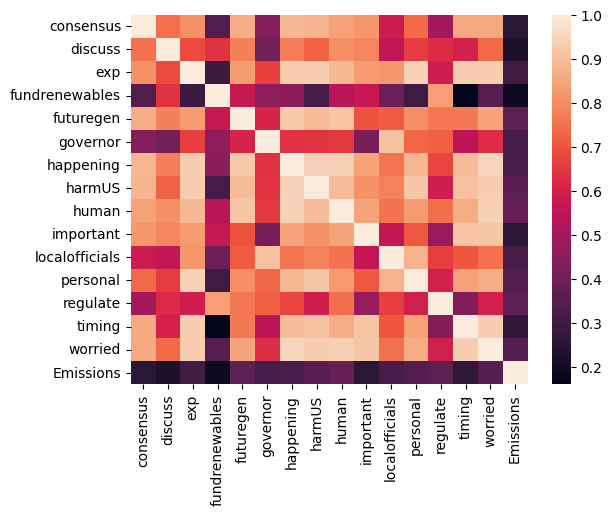

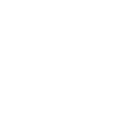

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
  
# plotting correlation heatmap
dataplot=sb.heatmap(data.corr())
  
# displaying heatmap
plt.figure(figsize = (1, 1), facecolor = None)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
import plotly.express as px

fruits = ["apples", "oranges", "bananas"]
fig = px.line(x=fruits, y=[1,3,2], color=px.Constant("This year"),
             labels=dict(x="Fruit", y="Amount", color="Time Period"))
fig.add_bar(x=fruits, y=[2,1,3], name="Last year")
fig.show()

Notes for later:

Create annotations

# Eric

In [ ]:
## Duplicating above block and making change to df_epa_census

In [ ]:
pat_ = re.compile(r'^emissions')
cols_ = [str(i) for i in list(df_epa_census.columns)]
emm_cols = [i for i in cols_ if pat_.match(i)]

emissions = pd.DataFrame(columns = ['State', 'emissions_per_capita', 'Year'])

for x in emm_cols:
    stacked = df_epa_census.groupby('State')[x].first().to_frame().reset_index()
    stacked['Year'] = x[-4:]
    stacked['Year'] = stacked['Year'].astype('int')
    stacked.rename(columns={stacked.columns[1]: "emissions_per_capita"}, inplace = True)
    emissions = pd.concat([emissions,stacked], ignore_index=True)

df_percapita = pd.merge(clean, emissions,  how='inner', left_on=['State','Year'], right_on = ['State','Year'])

df_percapita.head()

,State,Year,consensus,discuss,exp,fundrenewables,futuregen,governor,happening,harmUS,human,important,localofficials,personal,regulate,timing,worried,emissions_per_capita
0,AL,2017,42.740403,27.981576,32.926420,81.435566,63.691085,54.052863,58.322226,53.852949,44.865179,19.811181,53.912513,37.838678,72.202423,41.473315,49.786682,0.046050
1,AL,2018,42.210016,30.009477,39.918519,80.981482,63.360532,56.287425,63.640126,56.668332,50.573184,25.799250,56.906799,40.850684,75.061588,46.968881,58.543160,0.043100
2,AL,2019,41.512131,27.263854,31.872841,79.461023,57.420055,51.853764,56.520523,51.739402,45.170927,25.496519,52.749468,35.537128,68.195090,42.400642,51.384691,0.040634
3,AL,2020,48.618257,26.172580,37.283868,77.200511,64.060567,50.416915,64.078029,57.488688,45.793649,26.267216,50.573886,40.109367,69.696518,48.509352,56.107562,0.037678
4,AL,2021,47.468000,27.300000,38.020000,72.195000,61.855000,52.885000,63.291000,57.374000,49.350000,NaN,54.742000,40.623000,67.147000,52.176000,57.555000,0.035957


In [ ]:
pip install geopandas

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
df_states = gpd.read_file('/work/State Map Data/tl_2022_us_state.shp')
df_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [ ]:
feature_agg = df_percapita.groupby('State').agg(futuregen=('futuregen','mean')
                                    ,happening = ('happening','mean')
                                    ,human = ('human','mean')
                                    ,timing=('timing','mean')
                                    ,worried=('worried','mean')
                                    ,mean_emissions_percap=('emissions_per_capita','mean'))

feature_agg.head()

,futuregen,happening,human,timing,worried,mean_emissions_percap
State,,,,,,
AL,62.077448,61.170381,47.150588,46.305638,54.675419,0.040684
AR,64.650486,64.423545,49.195551,47.517048,56.017612,0.068834
AZ,68.807957,70.595117,55.829113,52.710260,62.518362,0.015756
CA,76.806782,76.931224,63.499521,61.930990,70.310926,0.041884
CO,70.715701,71.477052,56.853279,54.067246,63.616994,0.038609


In [ ]:
df_state_com = df_states.merge(feature_agg,how='inner',left_on=['STUSPS'], right_on=['State'])
##df_state_com = df_states_com.dropna()
df_state_com.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,AWATER,INTPTLAT,INTPTLON,geometry,futuregen,happening,human,timing,worried,mean_emissions_percap
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,...,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",57.467853,57.805673,41.976137,39.149320,48.022569,0.118020
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",70.191311,71.741399,54.812986,54.905490,62.692250,0.007577
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",73.642450,73.173831,59.374567,56.283115,63.831534,0.031776
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998...",72.087383,70.474914,54.965639,51.552709,60.553274,0.024524
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,...,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",76.588101,76.915562,63.026149,61.610793,69.258315,0.042725


Text(0.5, 1.0, '% of Respondents who believe climate change is happening')

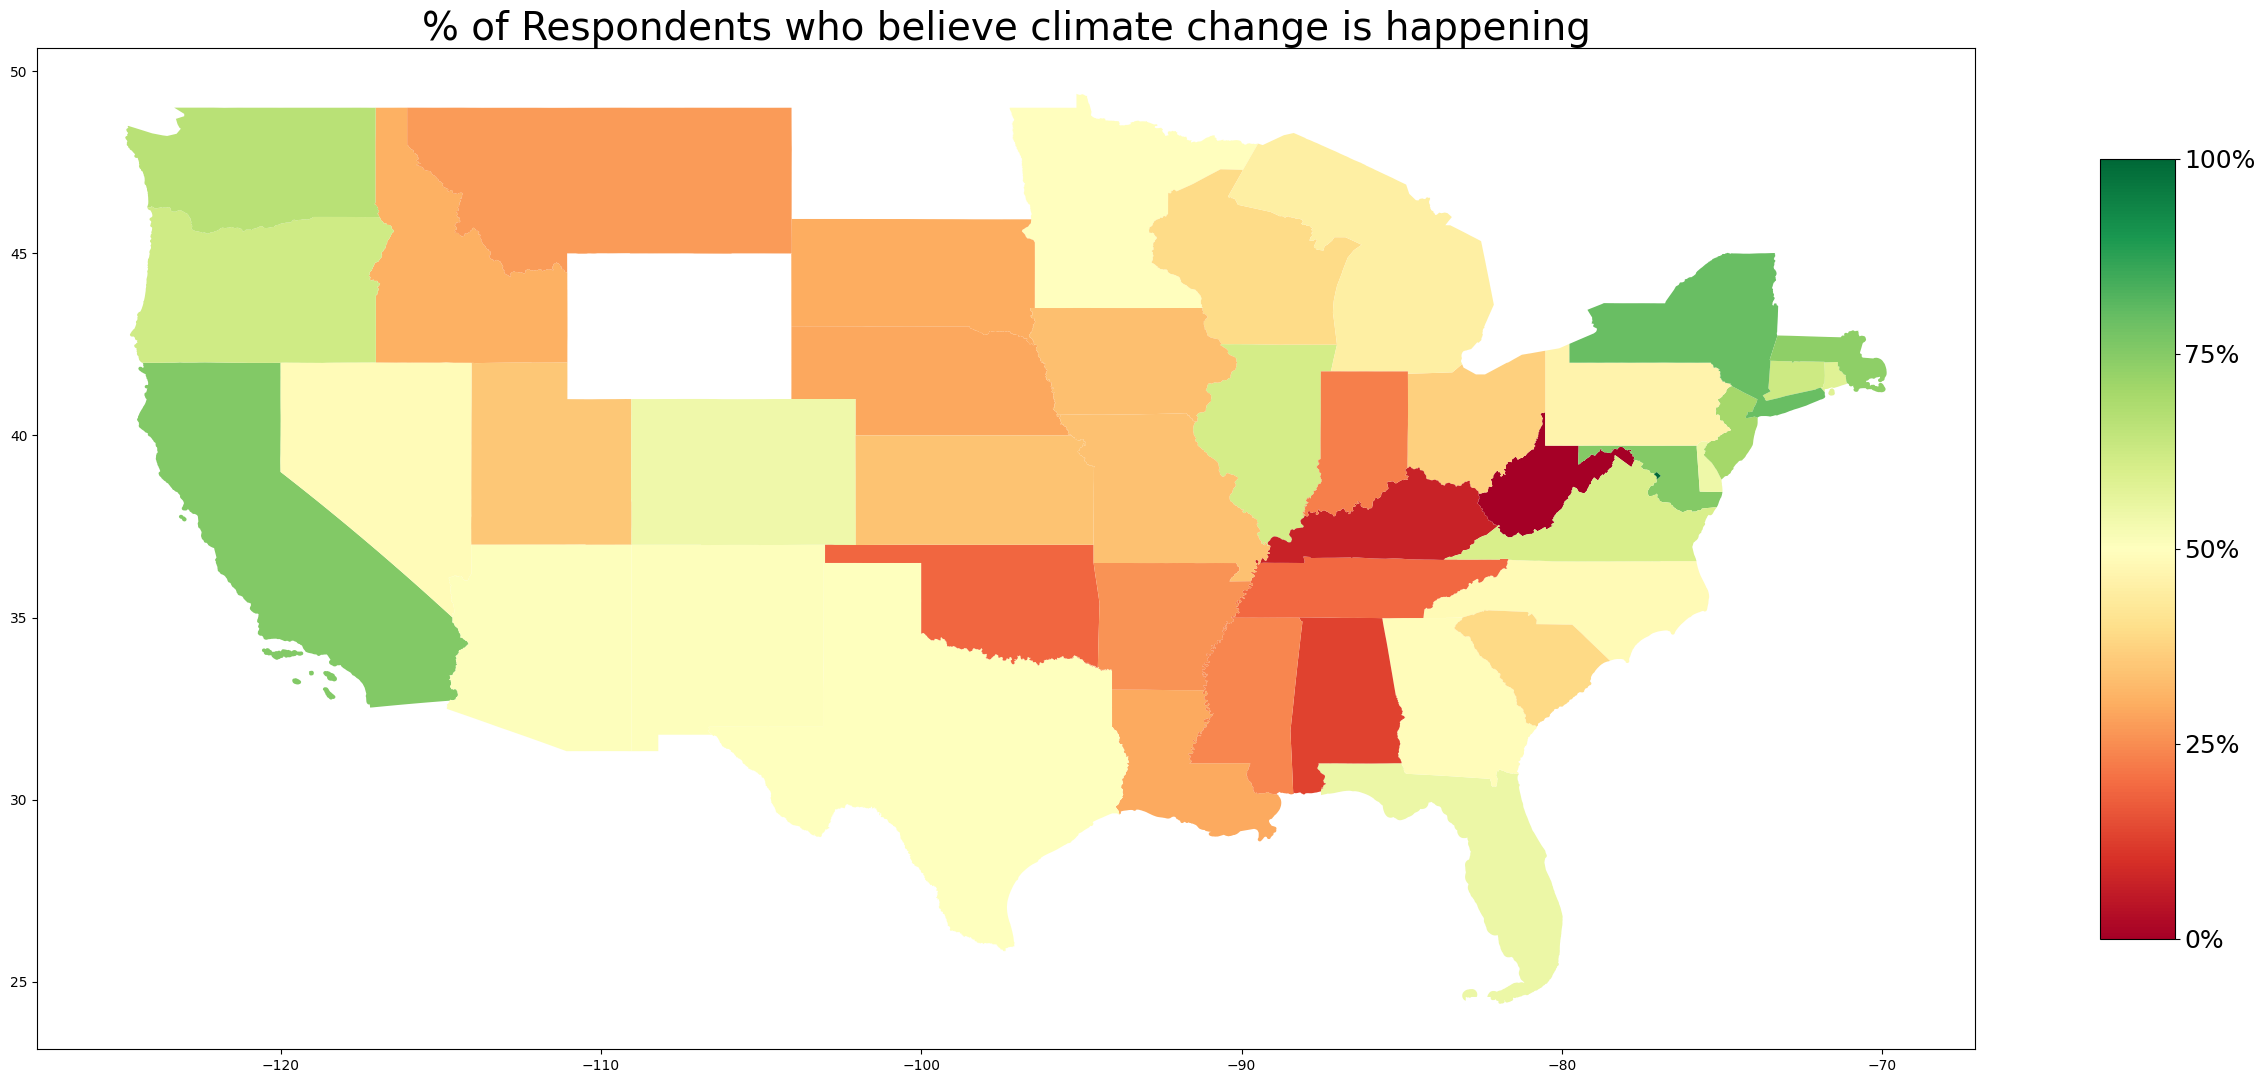

In [ ]:
colormap = 'RdYlGn'
ax = df_state_com.plot(column='happening', 
           figsize=(25, 20),
           cmap=colormap)
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])
cbax.set_title('')

sm = plt.cm.ScalarMappable(cmap=colormap)
cbar = fig.colorbar(sm, cax=cbax, ticks=[ 0,0.25,0.5,0.75, 1], format="%d")
cbar.ax.set_yticklabels(['0%', '25%','50%', '75%','100%'],size=18)
ax.set_title("% of Respondents who believe climate change is happening",size=28)

Text(0.5, 1.0, '% of Respondents who believe climate change is caused by human activities')

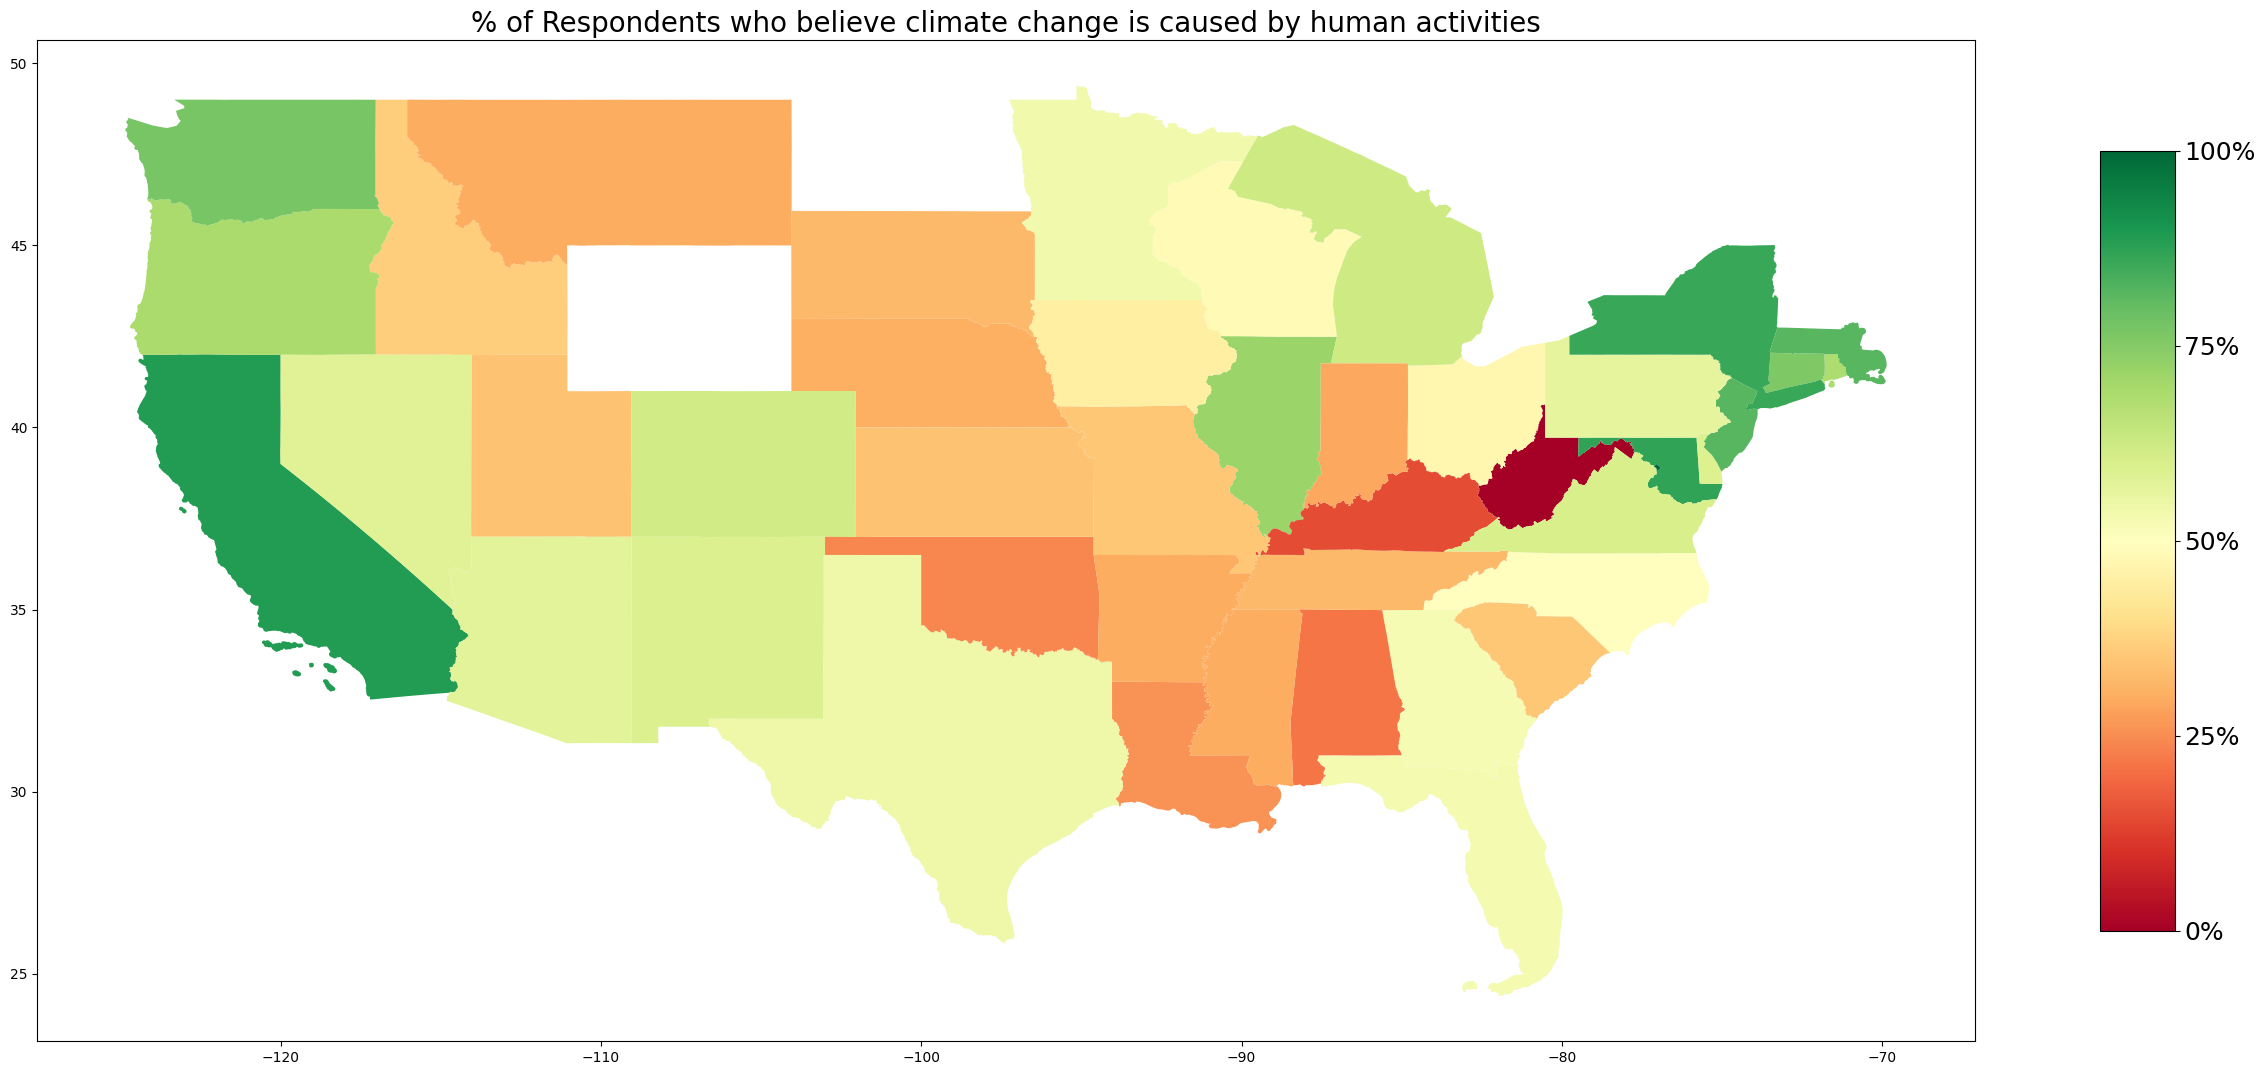

In [ ]:
colormap = 'RdYlGn'
ax = df_state_com.plot(column='human', 
           figsize=(25, 20),
           cmap=colormap)
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])
cbax.set_title('')

sm = plt.cm.ScalarMappable(cmap=colormap)
cbar = fig.colorbar(sm, cax=cbax, ticks=[ 0,0.25,0.5,0.75, 1], format="%d")
cbar.ax.set_yticklabels(['0%', '25%','50%', '75%','100%'],size=18)
ax.set_title("% of Respondents who believe climate change is caused by human activities",size=20)

Text(0.5, 1.0, '% of Respondents who are worried about climate change')

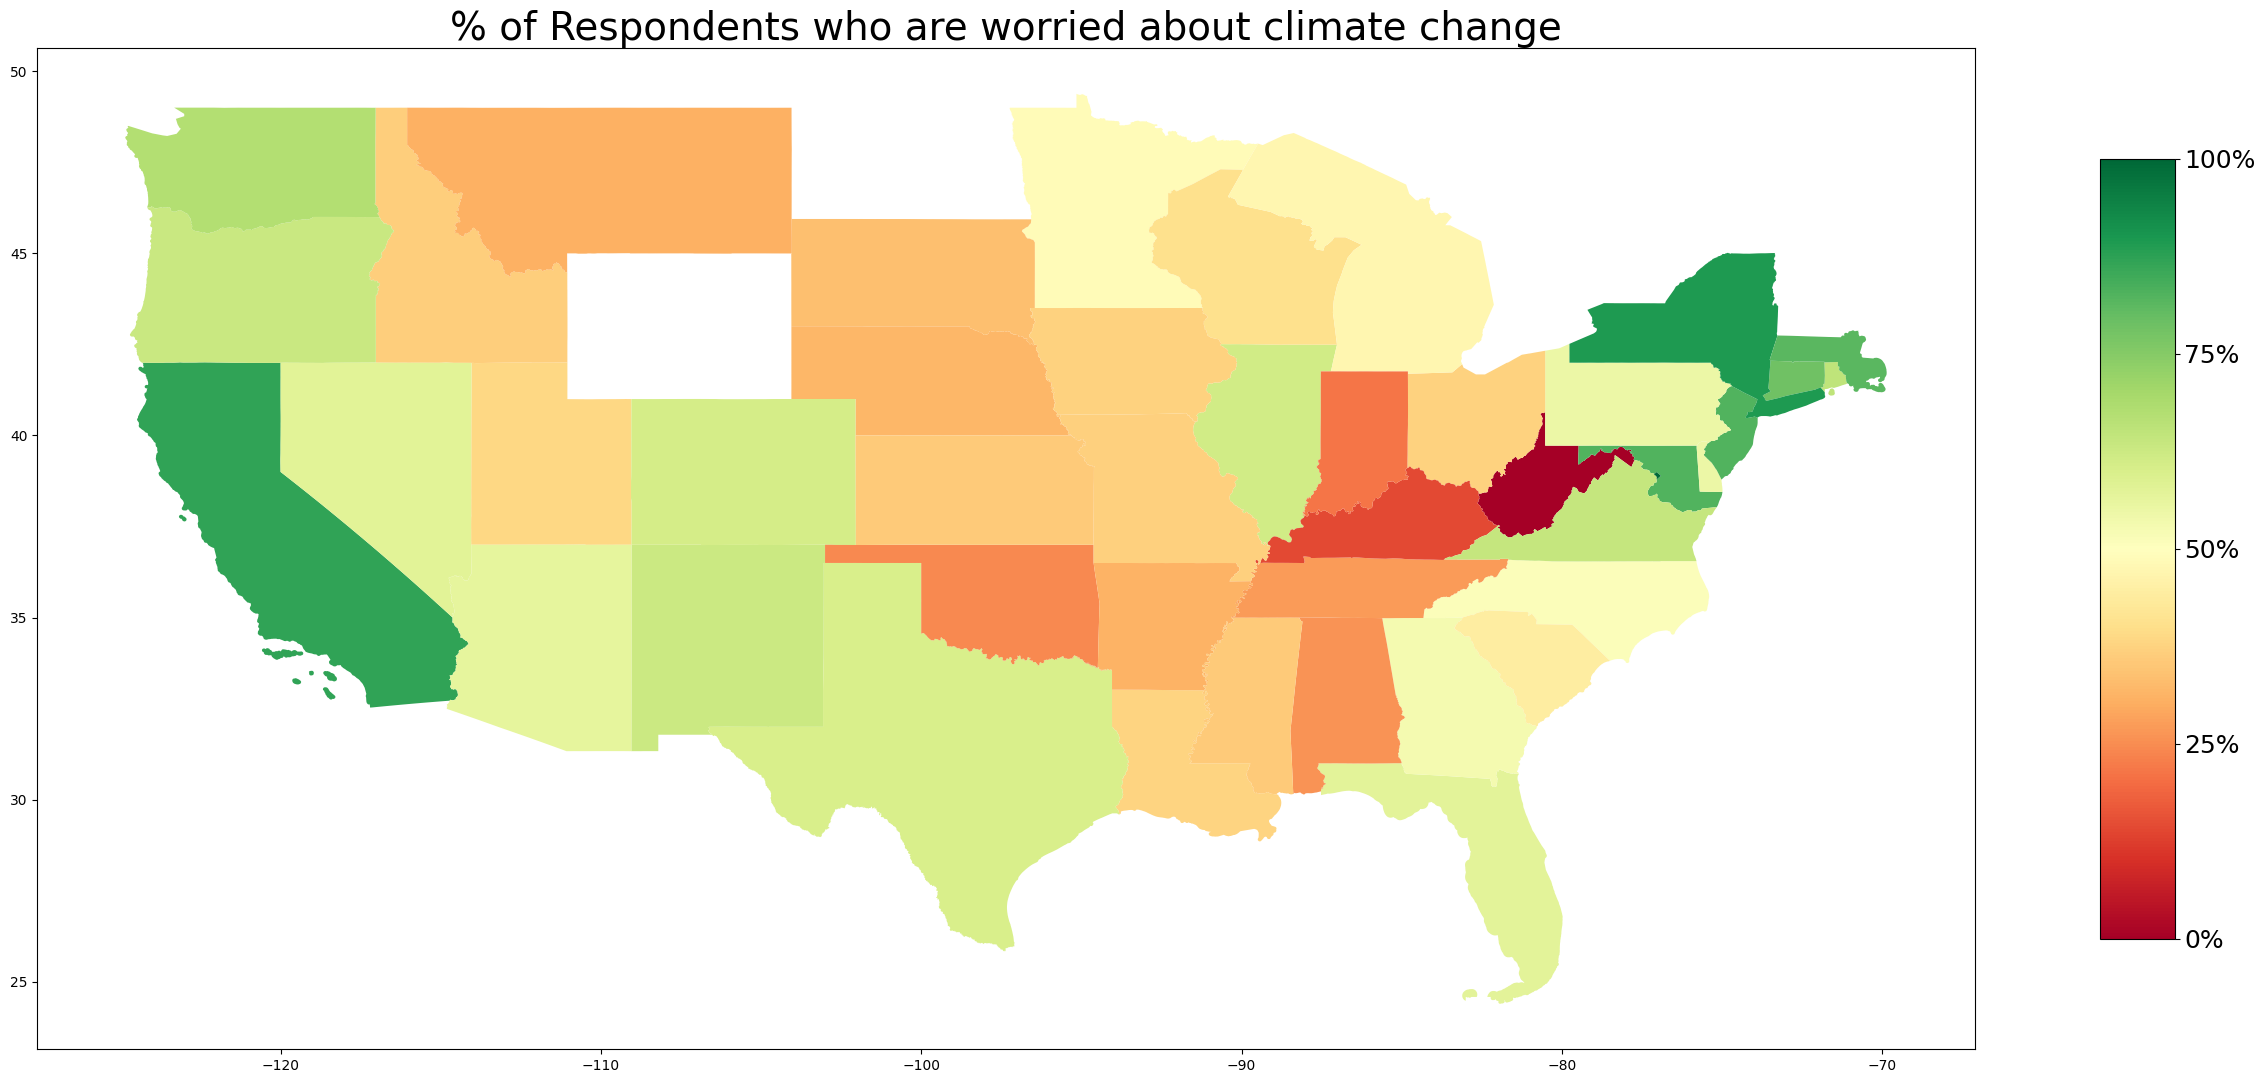

In [ ]:
colormap = 'RdYlGn'
ax = df_state_com.plot(column='worried', 
           figsize=(25, 20),
           cmap=colormap)
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])
cbax.set_title('')

sm = plt.cm.ScalarMappable(cmap=colormap)
cbar = fig.colorbar(sm, cax=cbax, ticks=[ 0,0.25,0.5,0.75, 1], format="%d")
cbar.ax.set_yticklabels(['0%', '25%','50%', '75%','100%'],size=18)
ax.set_title("% of Respondents who are worried about climate change",size=28)

In [ ]:
df_state_com['percap_norm'] = (df_state_com['mean_emissions_percap'] - df_state_com['mean_emissions_percap'].mean())/df_state_com['mean_emissions_percap'].std()
df_state_com.describe()

,ALAND,AWATER,futuregen,happening,human,timing,worried,mean_emissions_percap,percap_norm
count,4.400000e+01,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01
mean,1.613283e+11,9.565797e+09,69.201306,69.181446,54.315373,52.236083,60.900538,0.041651,-3.784851e-17
std,1.241611e+11,1.720360e+10,5.158988,5.266927,5.441775,6.123456,5.556094,0.029868,1.000000e+00
min,1.583162e+08,1.870979e+07,57.467853,57.805673,41.976137,39.149320,48.022569,0.007577,-1.140831e+00
25%,1.022645e+11,1.747836e+09,64.700919,65.351252,49.805984,47.490243,57.248970,0.019635,-7.371278e-01
50%,1.396277e+11,3.700030e+09,69.255963,69.805963,54.776091,52.070907,60.849196,0.031614,-3.360616e-01
75%,2.076220e+11,8.964738e+09,72.329246,72.637675,57.449129,56.271212,64.126510,0.049616,2.666655e-01
max,6.766856e+11,1.038679e+11,79.440150,83.161219,66.228235,70.095193,73.700107,0.131577,3.010783e+00


Text(0.5, 1.0, 'Average Normalized Per Capita Emissions')

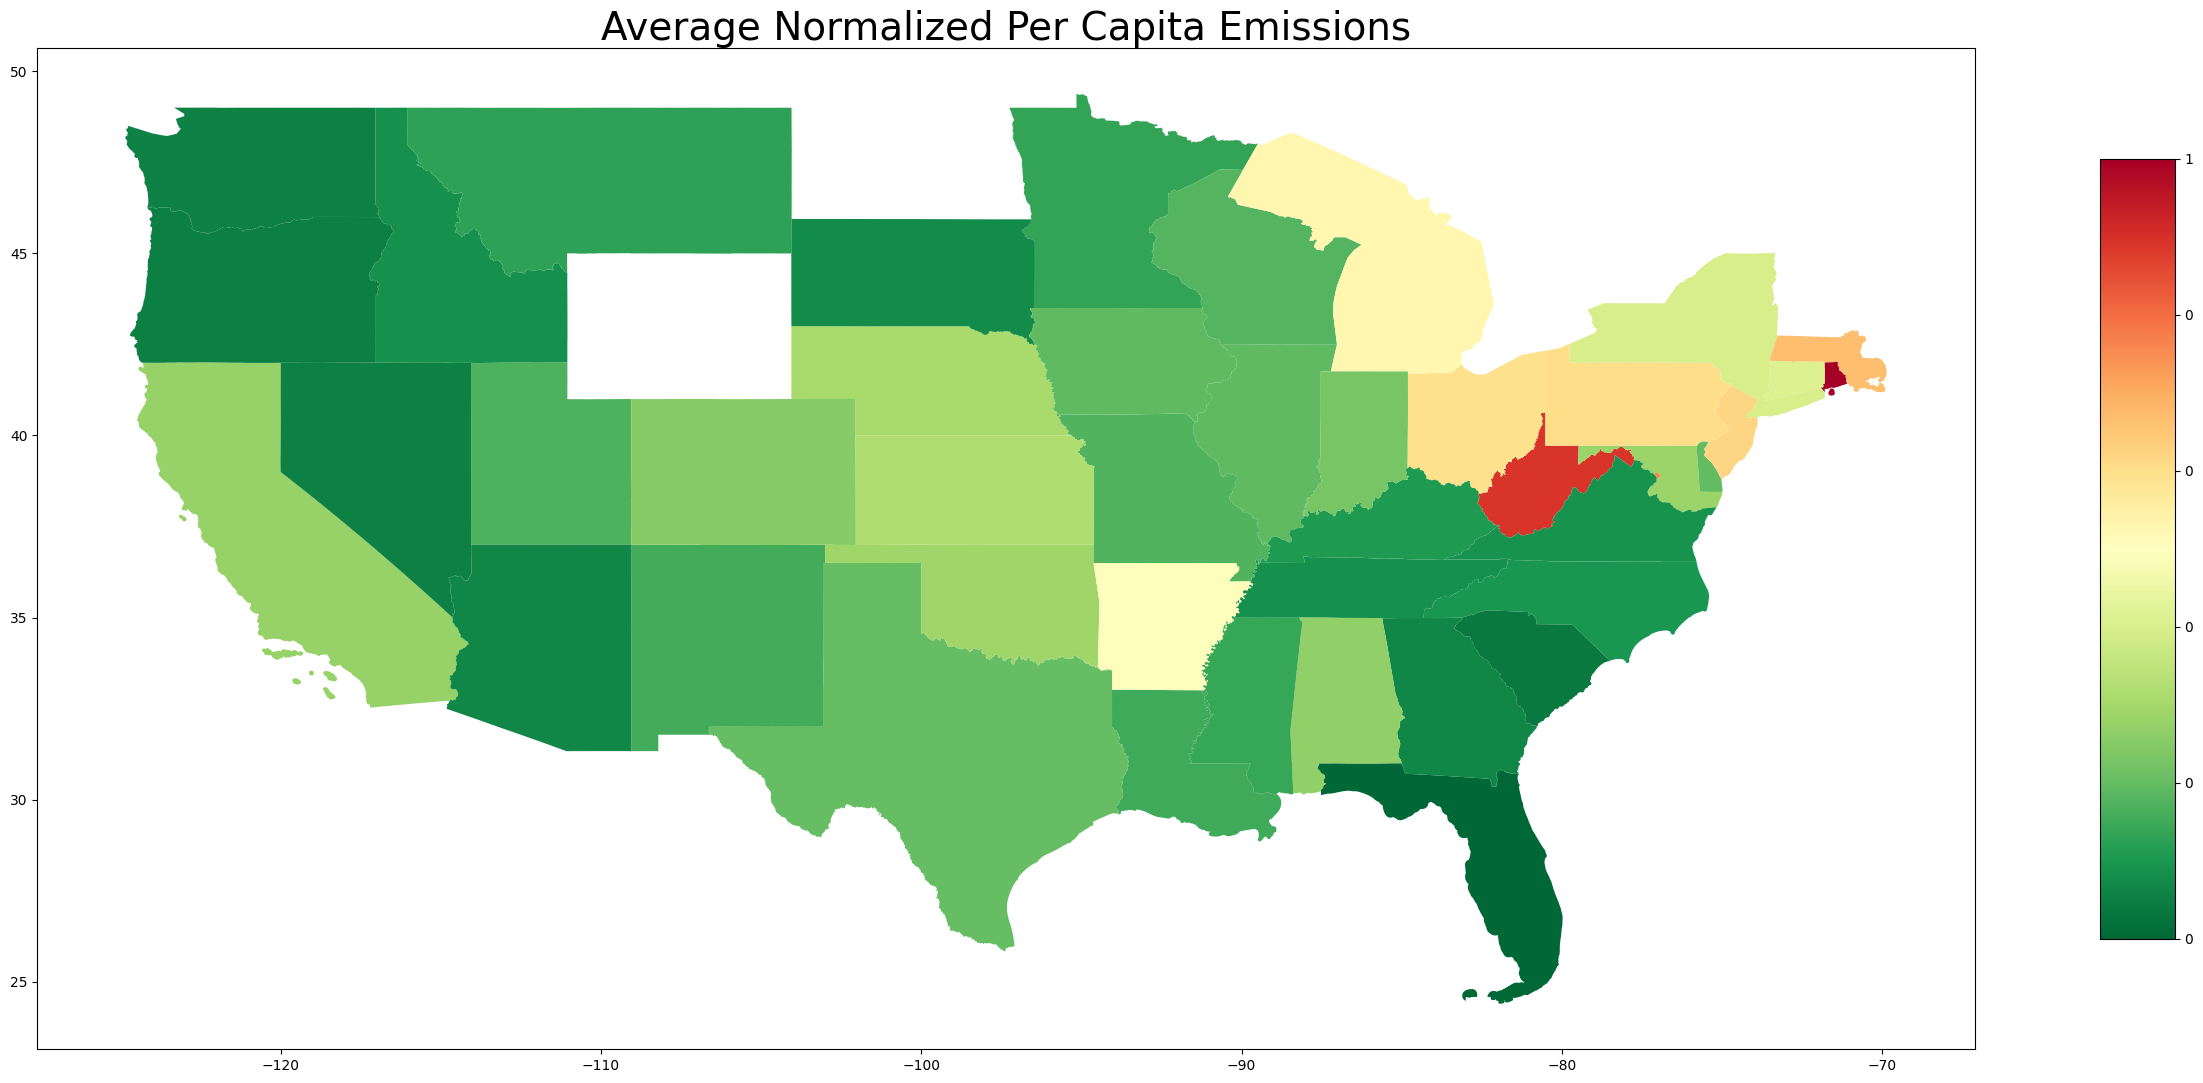

In [ ]:
colormap = 'RdYlGn_r'
ax = df_state_com.plot(column='percap_norm', 
           figsize=(25, 20),
           cmap=colormap)
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])
cbax.set_title('')
norm=plt.colors.LogNorm(vmin=.01, vmax=0.02)
sm = plt.cm.ScalarMappable(cmap=colormap)
fig.colorbar(sm, cax=cbax, format="%d")
##cbar.ax.set_yticklabels(['0%', '25%','50%', '75%','100%'],size=18)
ax.set_title("Average Normalized Per Capita Emissions",size=28)

In [ ]:
colormap = 'RdYlGn_r'
x_a = df_state_com['NAME']
y_a = df_state_com['mean_emissions_percap']

plt.rcParams['figure.figsize'] = (8, 9)
plt.scatter(y_a,x_a, c=y_a, vmin=y_a.min(), vmax=y_a.max(),cmap=colormap)
plt.ylabel('State', fontsize=14)
plt.xlabel('Per Capita Emissions', fontsize=14)
plt.colorbar(label='Per Capita Emissions')
##break
df_state_com[df_state_com['mean_emissions_percap'].dropna()]
#
from sklearn import linear_model
df_reg = df_percapita.dropna()
X = df_reg[[ 'Year', 'consensus', 'discuss', 'exp', 'fundrenewables',
       'futuregen', 'governor', 'happening', 'harmUS', 'human', 'important',
       'localofficials', 'personal', 'regulate', 'timing', 'worried']]
y = df_reg['emissions_per_capita']
#
regr = linear_model.LinearRegression()
regr.fit(X, y)
#
regr_features = list(X.columns)
coef_dict = {}
for coef, feat in zip(regr.coef_,regr_features):
    coef_dict[feat] = coef
coef_dict
#
X['Year'] = X['Year'].astype(str).astype(int)
#
import statsmodels.api as sm

# Build Model
x = sm.add_constant(X)
model = sm.OLS(y,x)
results = model.fit()

#
coef_df = pd.DataFrame(results.summary().tables[1].data)


coef_df.columns = coef_df.iloc[0]

coef_df=coef_df.drop(0)

coef_df = coef_df.set_index(coef_df.columns[0])

coef_df = coef_df.astype(float)

errors = coef_df['coef'] - coef_df['[0.025']

coef_df['errors'] = errors

coef_df = coef_df.drop(['const'])

coef_df = coef_df.sort_values(by=['coef'])


variables = list(coef_df.index.values)

coef_df['variables'] = variables

sns.set_context("poster")

fig, ax = plt.subplots(figsize=(15, 10))

coef_df.plot(x='variables', y='coef', kind='bar',
                ax=ax, color='none', fontsize=22, 
                ecolor='steelblue',capsize=0,
                yerr='errors', legend=False)

plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
ax.set_xlabel('',fontsize=22)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
            marker='o', s=80, 
            y=coef_df['coef'], color='steelblue')

ax.axhline(y=0, linestyle='--', color='red', linewidth=1)

plt.show()

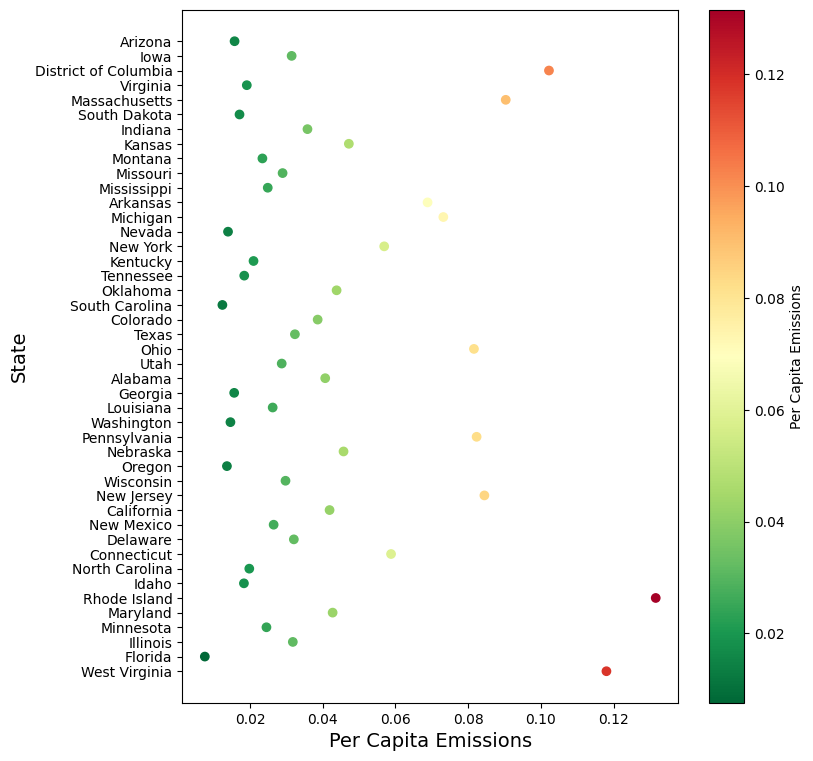

In [ ]:
colormap = 'RdYlGn_r'
x_a = df_state_com['NAME']
y_a = df_state_com['mean_emissions_percap']

plt.rcParams['figure.figsize'] = (8, 9)
plt.scatter(y_a,x_a, c=y_a, vmin=y_a.min(), vmax=y_a.max(),cmap=colormap)
plt.ylabel('State', fontsize=14)
plt.xlabel('Per Capita Emissions', fontsize=14)
plt.colorbar(label='Per Capita Emissions')


In [ ]:
df_state_com[df_state_com['mean_emissions_percap'].dropna()]

KeyError: "None of [Float64Index([ 0.11802010050411729,  0.00757737935339836,  0.03177564454463132,\n               0.02452362924071189,  0.04272467439314077,   0.1315767342515393,\n               0.01833309516415919, 0.019806470745272815,  0.05878933437058583,\n               0.03205742283340078,  0.02650198290598879,  0.04188355346989921,\n               0.08445687671208853,   0.0297658364603762, 0.013655658303002471,\n               0.04572268172289528,  0.08231811837874972,  0.01462072424586897,\n                0.0262356255904563, 0.015651357651629207,  0.04068388870004643,\n               0.02872073251744269,  0.08158744382665704,  0.03235193196391307,\n               0.03860874488212693,   0.0124078616716084,   0.0438155947718179,\n              0.018416571495031897, 0.020968824623621436, 0.056907335083442645,\n               0.01395595914089886,  0.07316503277751696,  0.06883411906323464,\n              0.024882332584733737, 0.028962841954728608,  0.02341343601959033,\n              0.047185722563744543,  0.03580448087547859, 0.017117875949841037,\n                0.0903281560084789, 0.019120887513842423,  0.10221751561543066,\n               0.03145239971450908, 0.015756167547130308],\n             dtype='float64')] are in the [columns]"

In [ ]:
from sklearn import linear_model
df_reg = df_percapita.dropna()
X = df_reg[[ 'Year', 'consensus', 'discuss', 'exp', 'fundrenewables',
       'futuregen', 'governor', 'happening', 'harmUS', 'human', 'important',
       'localofficials', 'personal', 'regulate', 'timing', 'worried']]
y = df_reg['emissions_per_capita']

In [ ]:
len(y)

176

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
regr_features = list(X.columns)
coef_dict = {}
for coef, feat in zip(regr.coef_,regr_features):
    coef_dict[feat] = coef
coef_dict

{'Year': -0.005916231466302523,
 'consensus': 0.0024376227414235913,
 'discuss': -0.002719297089934943,
 'exp': 0.0016287954328068688,
 'fundrenewables': -0.0037470958772973903,
 'futuregen': 0.0014511707141706966,
 'governor': 0.004576488412813889,
 'happening': -0.0013537176825723723,
 'harmUS': 0.0012650884398319425,
 'human': -0.0009058239679586665,
 'important': 0.00690083221047086,
 'localofficials': -0.0038932048003444213,
 'personal': -0.0022193540196600446,
 'regulate': 0.007865339203772883,
 'timing': -0.0021188864556068434,
 'worried': -0.004570842305541681}

In [ ]:
X['Year'] = X['Year'].astype(str).astype(int)

/tmp/ipykernel_80/2930032553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = X['Year'].astype(str).astype(int)


In [ ]:
import statsmodels.api as sm

# Build Model
x = sm.add_constant(X)
model = sm.OLS(y,x)
results = model.fit()

/tmp/ipykernel_80/2695230136.py:38: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


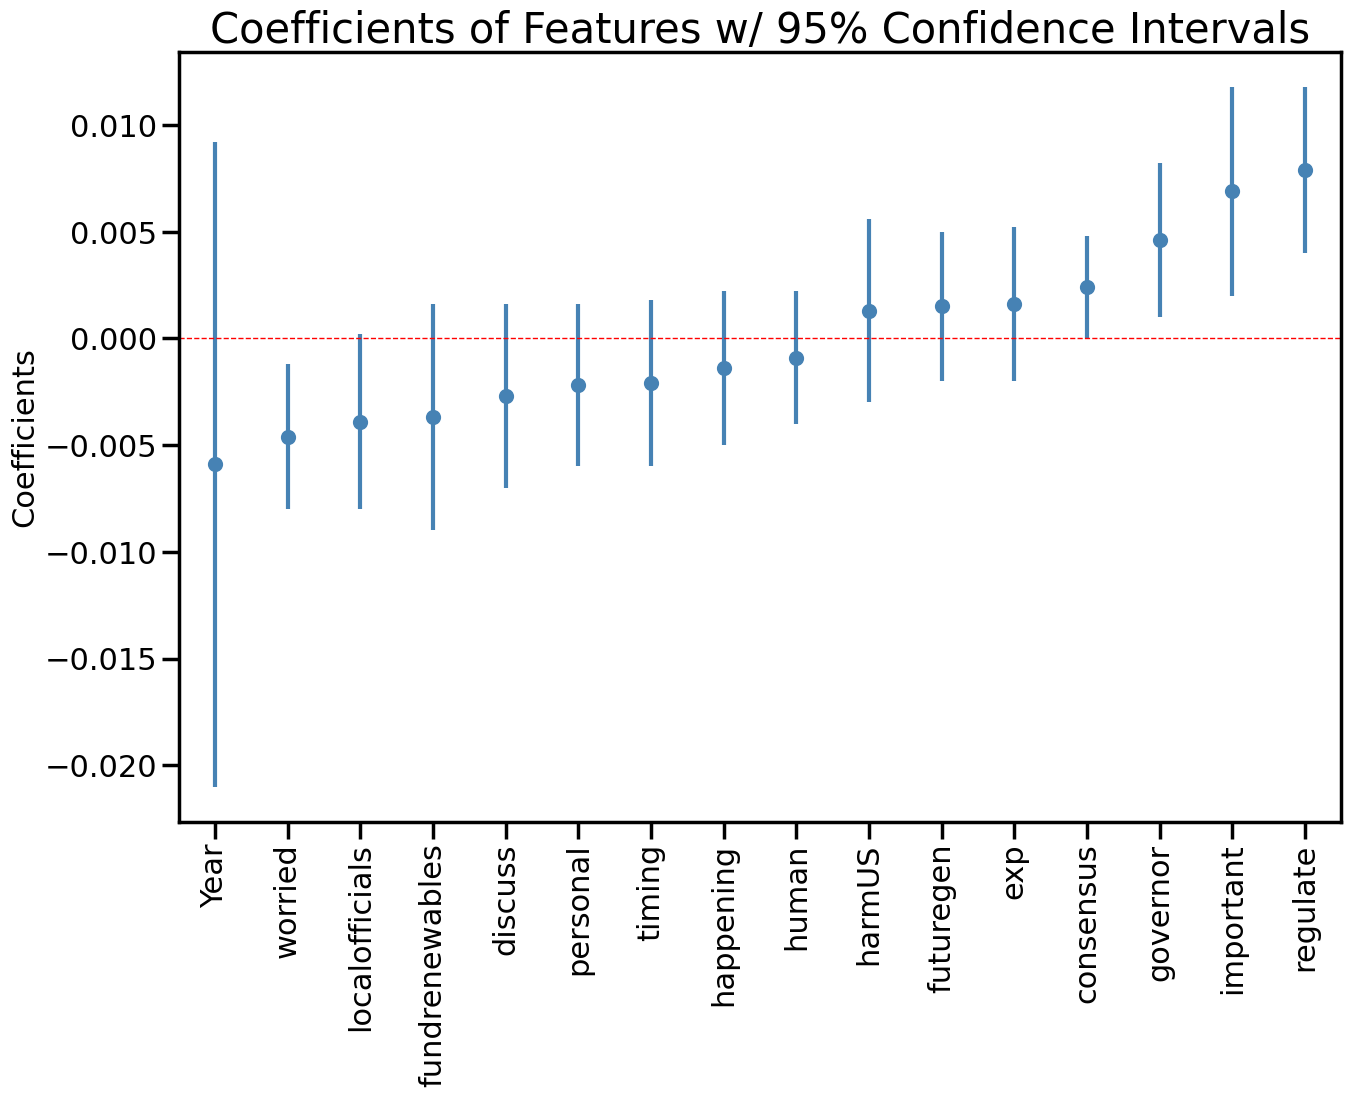

In [ ]:
coef_df = pd.DataFrame(results.summary().tables[1].data)


coef_df.columns = coef_df.iloc[0]

coef_df=coef_df.drop(0)

coef_df = coef_df.set_index(coef_df.columns[0])

coef_df = coef_df.astype(float)

errors = coef_df['coef'] - coef_df['[0.025']

coef_df['errors'] = errors

coef_df = coef_df.drop(['const'])

coef_df = coef_df.sort_values(by=['coef'])


variables = list(coef_df.index.values)

coef_df['variables'] = variables

sns.set_context("poster")

fig, ax = plt.subplots(figsize=(15, 10))

coef_df.plot(x='variables', y='coef', kind='bar',
                ax=ax, color='none', fontsize=22, 
                ecolor='steelblue',capsize=0,
                yerr='errors', legend=False)

plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
ax.set_xlabel('',fontsize=22)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
            marker='o', s=80, 
            y=coef_df['coef'], color='steelblue')

ax.axhline(y=0, linestyle='--', color='red', linewidth=1)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dba65b6f-1e7d-456c-82af-a22fa37ebbcd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>